In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [17]:
model = load_model('cnn_lstm.keras')

c:\Ai Model\CNN + RNN Model\venv\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [18]:
img_height = 224
img_width = 224


In [19]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

In [20]:
def predict_image(img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)[0][0]
    label = 'Real' if prediction >= 0.5 else 'Fake'
    confidence = prediction if prediction >= 0.5 else 1 - prediction
    print(f"Prediction: {label} ({confidence:.2f})")

    # Display image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.title(f'{label} ({confidence:.2f})')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction: Fake (0.87)


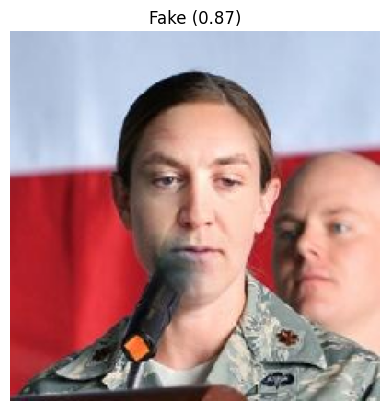

In [24]:
predict_image('testimg/fake2.jpg')
